# IA 2023 - Sergio Vega García
## Reconocedor de números

### Nivel C

Haremos una comparación de los siguientes modelos: 
- [Regresión logística](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) 
- [Perceptron](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)
- [Arbol de decisión](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
- [Bosque aleatorio](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

Para hacer el aprendizaje usaremos el dataset "[digitos](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)" de scikit-learn y la comparación de los modelos se hará con el rendimiento de cada modelo con el conjunto de test que hemos elegido y la matriz de confusión. 

Los digitos con los que vamos a trabajar tienen la siguiente apariencia

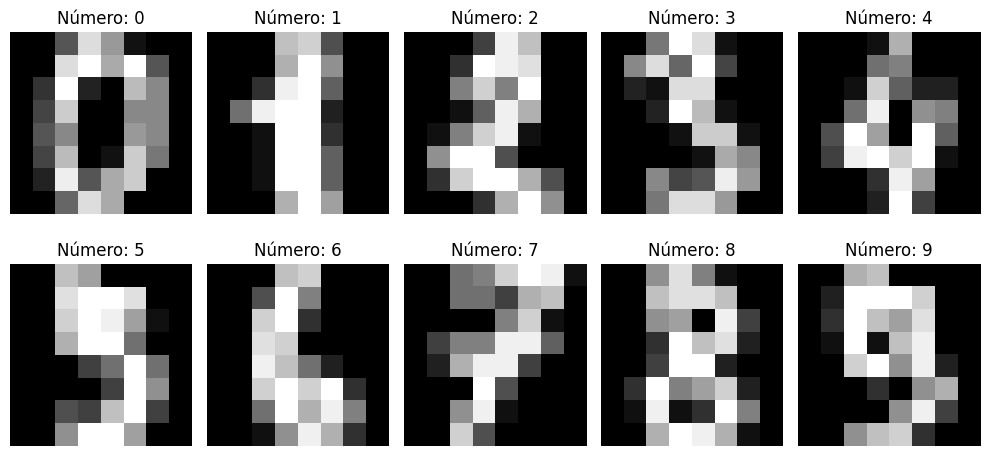

In [31]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# Cargamos el dataset
digits = load_digits()

# Mostramos las imágenes de los primeros 10 valores en 2 filas de 5
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

for i in range(10):
    axes[i // 5, i % 5].imshow(digits.images[i], cmap='gray')
    axes[i // 5, i % 5].set_title(f'Número: {digits.target[i]}')
    axes[i // 5, i % 5].axis('off')

plt.tight_layout()
plt.show()

#### Entrenamiento

Para un correcto entrenamiento hemos de separar el dataset en dos subconjuntos, uno de entrenamiento (común para todos) con el cual se entrenará los distintos modelos y otro de test (común para todos) con el que se realizaran los analisis, pruebas, tests, etc.

In [32]:
#  Imports
from sklearn.model_selection import train_test_split

# Separamos el dataset en datos y etiquetas de entreno y de test
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.33, random_state=42)

Mostramos la distribución de digitos en los dos subconjuntos para ver que no se sobrerepresenta o infrarepresenta algun digito en alguno delos dos subconjuntos

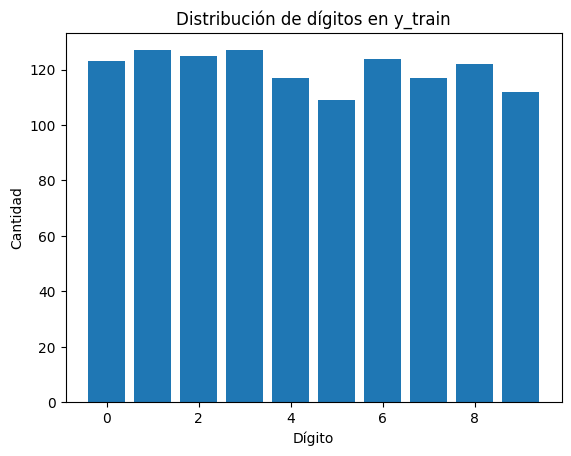

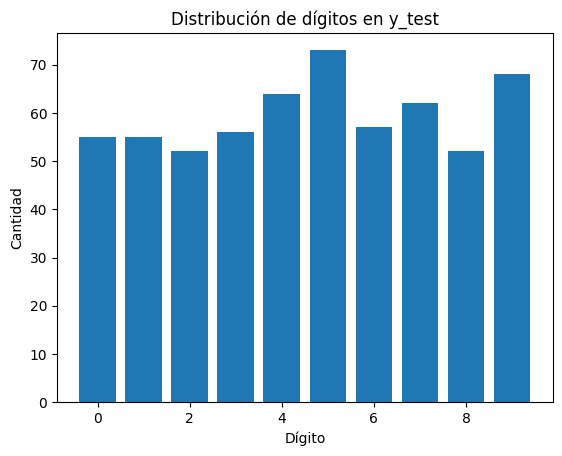

In [33]:
import numpy as np

# Función para mostrar la distribución de los dígitos
def plot_digit_distribution(y, title):
    unique, counts = np.unique(y, return_counts=True)
    plt.bar(unique, counts)
    plt.xlabel('Dígito')
    plt.ylabel('Cantidad')
    plt.title(title)
    plt.show()

# Mostrar la distribución de los dígitos en y_train
plot_digit_distribution(y_train, 'Distribución de dígitos en y_train')

# Mostrar la distribución de los dígitos en y_test
plot_digit_distribution(y_test, 'Distribución de dígitos en y_test')

Como podemos ver, los dos subconjuntos estan medianamente equilibrados.

Procedemos a entrenar los distintos modelos.

In [34]:
# Imports
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Regresión logística
dlr = LogisticRegression(max_iter=2000)                     # Inicializamos el modelo
dlr.fit(x_train, y_train);                                  # Entrenamos el modelo con los datos de entreno

# Perceptron
dp = Perceptron(tol=1e-9, random_state=42)                  # Inicializamos el modelo
dp.fit(x_train, y_train);                                   # Entrenamos el modelo con los datos de entreno

# Arbol de decisión
ddt = DecisionTreeClassifier(random_state=42)               # Inicializamos el modelo
ddt.fit(x_train, y_train);                                  # Entrenamos el modelo con los datos de entreno

# Bosque aleatorio
drf = RandomForestClassifier(max_depth=2, random_state=42)  # Inicializamos el modelo
drf.fit(x_train, y_train);                                  # Entrenamos el modelo con los datos de entreno

#### Comparación

##### Comparación de rendimientos

In [35]:
# Imports
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

modelos = [
    "Regresión logística",
    "Perceptron",
    "Arbol de decisiones",
    "Bosque aleatorio",
]

models = [dlr, dp, ddt, drf]

metrics = {
    "Modelo": modelos,
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "f1-score": [],
}

# Calculamos las distintas metricas para cada modelo
for model in models:
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="macro")
    recall = recall_score(y_test, y_pred, average="macro")
    f1 = f1_score(y_test, y_pred, average="macro")

    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["f1-score"].append(f1)

print(pd.DataFrame(metrics))

                Modelo  Accuracy  Precision    Recall  f1-score
0  Regresión logística  0.973064   0.972941  0.973677  0.973194
1           Perceptron  0.947811   0.950544  0.948666  0.947146
2  Arbol de decisiones  0.833333   0.834553  0.832242  0.831678
3     Bosque aleatorio  0.824916   0.836489  0.829303  0.820900


Analizar las metricas.

##### Matrices de confusión

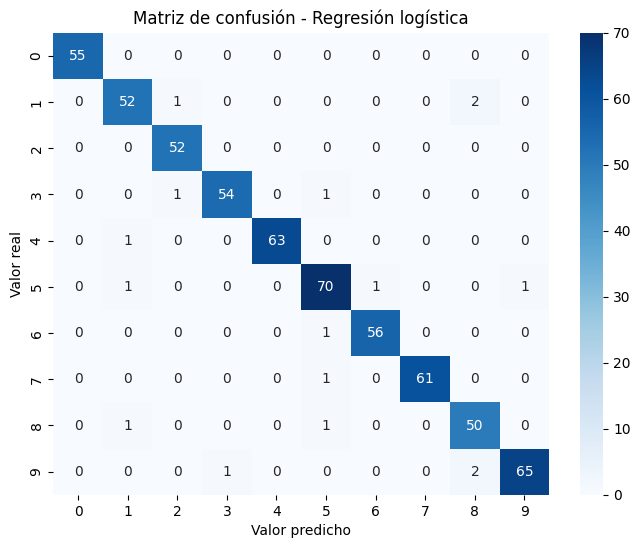

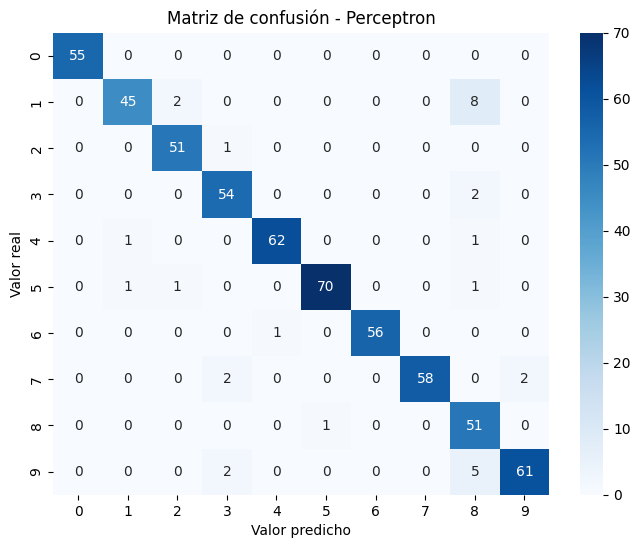

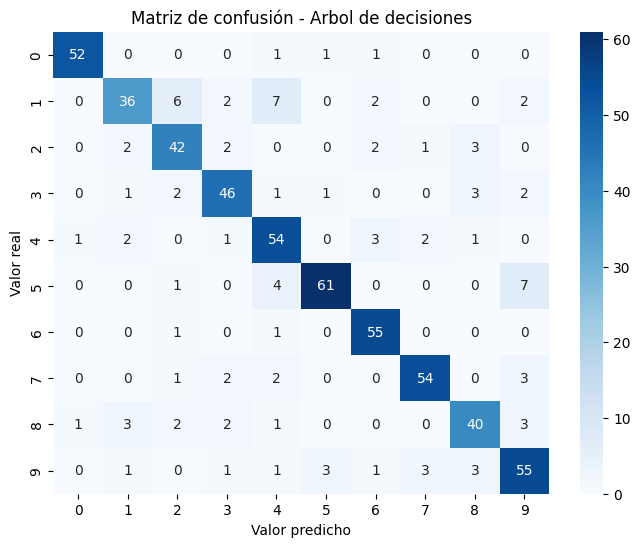

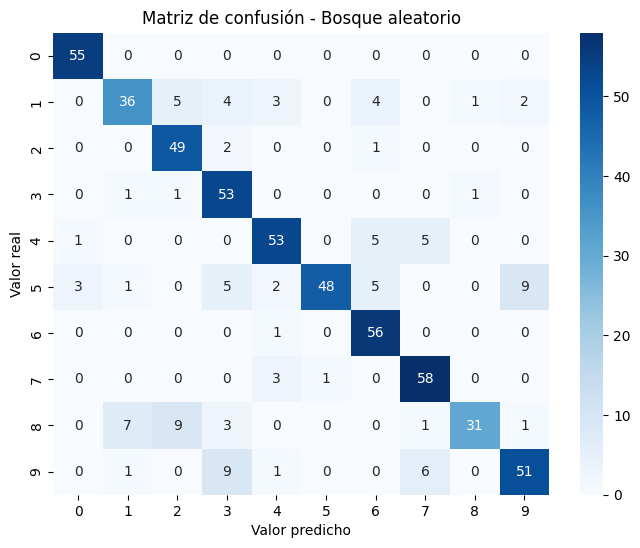

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Función para mostrar la matriz de confusión de los modelos
def plot_confusion_matrix(model, model_name, x_test, y_test):
    conf_matrix = confusion_matrix(y_test, model.predict(x_test))
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Valor predicho")
    plt.ylabel("Valor real")
    plt.title(f"Matriz de confusión - {model_name}")
    plt.show()


plot_confusion_matrix(dlr, "Regresión logística", x_test, y_test)
plot_confusion_matrix(dp, "Perceptron", x_test, y_test)
plot_confusion_matrix(ddt, "Arbol de decisiones", x_test, y_test)
plot_confusion_matrix(drf, "Bosque aleatorio", x_test, y_test)

Analizar las matrices.